# Proyek Analisis Data Sentimen: Komen Platform Youtube TVRI Tahun 2024
- **Nama:** Dede Pratama
- **Email:**
- **ID Card:**

# Menentukan Rumusan Masalah

1.   Distribusi sentimen positif, negatif, dan netral dalam komentar audiens pada kanal YouTube TVRI sepanjang tahun 2024.

2.   Identifikasi faktor atau tema dominan yang muncul dalam komentar audiens, baik yang bernuansa positif maupun negatif.

3.   Pemanfaatan hasil analisis sentimen sebagai dasar evaluasi efektivitas program serta penyusunan strategi komunikasi media TVRI di era digital.

## Data Loading


Proses :

1.  Import Library → menggunakan pandas untuk membaca file .csv atau .xlsx.

2.  Load Dataset → membaca data dari file eksternal.

3.  Cek Informasi Data → menampilkan jumlah baris, kolom, dan tipe data.

4.  Preview Data → menampilkan 5–20 baris teratas supaya bisa memastikan struktur dataset benar.

In [ ]:
import pandas as pd
from google.colab import drive

file_path = '/content/sample_data/Comment Youtube TVRI 2024 edit.xlsx'

# Load the Excel file into a DataFrame
try:
    df = pd.read_excel(file_path)
    print("✅ Dataset loaded successfully.")
    print("Jumlah baris & kolom:", df.shape)
    print("\nNama kolom yang tersedia:", df.columns.tolist())
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}. Please check the path and file name.")
except Exception as e:
    print(f"An error occurred during data loading: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Dataset loaded successfully.
Jumlah baris & kolom: (776, 9)

Nama kolom yang tersedia: ['video_id', 'video_title', 'video_published_date', 'comment_id', 'comment', 'num_of_likes', 'parent_comment_id', 'comment_date', 'Sentimen']


,video_id,video_title,video_published_date,comment_id,comment,num_of_likes,parent_comment_id,comment_date,Sentimen
0,LY9tz7J6syo,SOENTING MELAJOE | FILM DRAMA BIOGRAFI ROEHANA...,2024-01-11 14:17:33,UgyE9XD20Pyt-rPcM0J4AaABAg,syuting film ini berlokasi di rumah keluarga b...,0,NaN,2023-10-16 15:36:12,NaN
1,LY9tz7J6syo,SOENTING MELAJOE | FILM DRAMA BIOGRAFI ROEHANA...,2024-01-11 14:17:33,UgwY3qJnKWx9ky9Hh4N4AaABAg,terima kepada semua Kru Film ini dan TVRI Suma...,0,NaN,2023-11-03 07:54:35,NaN
2,IYr_Ltzp0I8,SOENTING MELAJOE | FILM DRAMA BIOGRAFI ROEHANA...,2024-01-11 14:17:37,Ugx_0138IO8pgWXmHhp4AaABAg,Ditunggu cerita lainnya,0,NaN,2023-11-10 14:23:42,NaN
3,IYr_Ltzp0I8,SOENTING MELAJOE | FILM DRAMA BIOGRAFI ROEHANA...,2024-01-11 14:17:37,UgwZ5OBe0avQ9OQJPJd4AaABAg,Koto gadang negerinya para pahlawan indonesia,0,NaN,2024-05-07 16:07:30,NaN
4,bBBngXsoyxQ,PENENTU KEMENANGAN - DRAMA KOMEDI SPESIAL PEMILU,2024-01-12 19:00:34,Ugx9VcWnL8Yg3l9Rh9F4AaABAg,😂😂😂 bg faru totalitas tanpa batas,0,NaN,2024-01-17 12:13:45,NaN


## Preprocessing Data (Text Cleaning)


Kode ini digunakan untuk membersihkan teks (text preprocessing) sebelum dianalisis lebih lanjut (misalnya untuk analisis sentimen, klasifikasi, atau clustering). Data teks biasanya masih “kotor” (ada URL, angka, emoji, simbol, dll.), sehingga perlu diproses agar model machine learning/NLP lebih mudah memahami pola bahasanya.

In [ ]:
import re
import string

def remove_urls(text):
    """Removes URLs from text."""
    if not isinstance(text, str): return ""
    return re.sub(r'http\S+', '', text)

def remove_punctuation(text):
    """Removes punctuation from text."""
    if not isinstance(text, str): return ""
    return re.sub(r'[%s]' % re.escape(string.punctuation), '', text)

def remove_numbers(text):
    """Removes numbers from text."""
    if not isinstance(text, str): return ""
    return re.sub(r'\d+', '', text)

def remove_whitespace(text):
    """Removes extra whitespace and newlines, and strips leading/trailing space."""
    if not isinstance(text, str): return ""
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def remove_mentions_hashtags(text):
    """Removes mentions and hashtags from text."""
    if not isinstance(text, str): return ""
    text = re.sub(r'@[^\s]+', '', text)
    text = re.sub(r'#([^\s]+)', '', text)
    return text

def remove_emojis(text):
    """Removes basic emojis from text."""
    if not isinstance(text, str): return ""
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def clean_text_pipeline(text):
    """Applies a sequence of cleaning steps to text."""
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = remove_numbers(text)
    text = remove_mentions_hashtags(text)
    text = remove_emojis(text)
    text = remove_whitespace(text) # Apply whitespace removal last
    return text

# Apply the cleaning pipeline to the relevant column (assuming 'comment' is the column with comments)
# Make sure to change 'comment' if your column name is different
# Check if 'comment' column exists before applying
if 'comment' in df.columns:
    df['cleaned_comment'] = df['comment'].apply(clean_text_pipeline)
    print("✅ Text cleaning applied.")
    display(df[['comment', 'cleaned_comment']].head())
else:
    print("Error: 'comment' column not found in the DataFrame.")
    print("Available columns:", df.columns)

✅ Text cleaning applied.


,comment,cleaned_comment
0,syuting film ini berlokasi di rumah keluarga b...,syuting film ini berlokasi di rumah keluarga b...
1,terima kepada semua Kru Film ini dan TVRI Suma...,terima kepada semua Kru Film ini dan TVRI Suma...
2,Ditunggu cerita lainnya,Ditunggu cerita lainnya
3,Koto gadang negerinya para pahlawan indonesia,Koto gadang negerinya para pahlawan indonesia
4,😂😂😂 bg faru totalitas tanpa batas,bg faru totalitas tanpa batas


## Text Representation (TF-IDF)

Bagian ini berfungsi untuk mengonversi data teks yang telah dibersihkan menjadi representasi numerik menggunakan teknik TF-IDF (Term Frequency-Inverse Document Frequency). Proses ini merupakan evolusi dari metode Bag of Words yang lebih sophisticated untuk preprocessing data teks dalam machine learning.

TF-IDF adalah metode representasi teks yang:


a.                      Term Frequency (TF): Mengukur seberapa sering suatu kata muncul dalam dokumen.

b.                      Inverse Document Frequency (IDF): Mengukur pentingnya kata berdasarkan kelangkaannya di seluruh corpus.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'cleaned_comment' column exists from the previous step
# If not, please ensure the text cleaning cell was executed successfully.

# Initialize TF-IDF Vectorizer
# You can adjust parameters like max_features, min_df, max_df, ngram_range
tfidf_vectorizer = TfidfVectorizer(max_features=5000,  # Example: consider top 5000 features
                                   ngram_range=(1, 2) # Example: consider unigrams and bigrams
                                  )

# Fit and transform the cleaned comments
# Make sure 'cleaned_comment' column exists and is not empty
if 'cleaned_comment' in df.columns and not df['cleaned_comment'].empty:
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_comment'])

    print("✅ TF-IDF matrix created.")
    print("Shape of TF-IDF matrix:", tfidf_matrix.shape)
    # Displaying a sample of the feature names
    print("\nSample Feature Names (up to 20):")
    print(tfidf_vectorizer.get_feature_names_out()[:20])

else:
    print("Error: 'cleaned_comment' column not found or is empty. Please run text cleaning first.")

✅ TF-IDF matrix created.
Shape of TF-IDF matrix: (776, 5000)

Sample Feature Names (up to 20):
['aamiin' 'aamiin aamiin' 'aamiinaamiin' 'aamiinaamiin ya' 'aamiinbravo'
 'aamiinbravo uni' 'aammiiinnn' 'abad' 'abad umurnya' 'abad wilayah'
 'abal' 'abal sy' 'abang' 'abang aku' 'abs' 'abs sbk' 'abssbk' 'abu'
 'acara' 'ad']


Analisis :

Tahapan kode ini bertujuan untuk:

a.   Mengubah teks hasil pembersihan (cleaned_comment) menjadi representasi numerik menggunakan TF-IDF.


b.   Menyediakan data dalam bentuk matriks fitur agar bisa dipakai pada analisis lebih lanjut seperti klasifikasi, clustering, atau analisis sentimen.

## Text Representation (Bag of Words - BoW)

Bagian ini berfungsi untuk mengonversi data teks yang telah dibersihkan menjadi representasi numerik menggunakan teknik Bag of Words (BoW). Proses ini merupakan langkah krusial dalam preprocessing data teks untuk machine learning, karena algoritma machine learning hanya dapat memproses data dalam format numerik, bukan teks mentah.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Tanpa stopwords (biar tidak error)
bow_vectorizer = CountVectorizer(max_features=5000)

X_bow = bow_vectorizer.fit_transform(df["comment"])

print("Shape BoW:", X_bow.shape)
print("Contoh fitur BoW:", bow_vectorizer.get_feature_names_out()[:20])


Shape BoW: (776, 3180)
Contoh fitur BoW: ['000' '01' '01ini' '01menang' '02' '02untuk' '03' '04' '08'
 '085376186445' '0jwru2exog' '10' '1000' '12' '12rb' '14' '16' '17' '175'
 '1periode']


In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Download stopwords NLTK (sekali saja)
nltk.download("stopwords")

# Ambil stopwords bahasa Indonesia
stop_words_ind = stopwords.words("indonesian")

# Vectorizer dengan stopwords Indonesia
bow_vectorizer = CountVectorizer(max_features=5000, stop_words=stop_words_ind)

X_bow = bow_vectorizer.fit_transform(df["comment"])

print("Shape BoW:", X_bow.shape)
print("Contoh fitur BoW:", bow_vectorizer.get_feature_names_out()[:20])


Shape BoW: (776, 2840)
Contoh fitur BoW: ['000' '01' '01ini' '01menang' '02' '02untuk' '03' '04' '08'
 '085376186445' '0jwru2exog' '10' '1000' '12' '12rb' '14' '16' '17' '175'
 '1periode']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


## Preparing Data for Model Training

Bagian ini merupakan tahap persiapan akhir sebelum data dapat digunakan untuk melatih model machine learning. Setelah data teks dikonversi menjadi fitur numerik (menggunakan TF-IDF atau Bag of Words), tahap ini memastikan data dalam format yang optimal dan siap untuk proses pembelajaran algoritma.Proses persiapan ini umumnya mencakup:

1.   Data splitting (pembagian data training, validation, dan testing).


2.   Feature scaling/normalization (standardisasi rentang nilai fitur).


3.   Data reshaping (penyesuaian dimensi data sesuai kebutuhan model).


4.   Label encoding (konversi label kategorikal menjadi numerik).


5.   Handling missing values (penanganan nilai yang hilang)

In [ ]:
print(df.columns)


Index(['video_id', 'video_title', 'video_published_date', 'comment_id',
       'comment', 'num_of_likes', 'parent_comment_id', 'comment_date',
       'Sentimen', 'cleaned_comment'],
      dtype='object')


In [ ]:
print(df.columns.tolist())


['video_id', 'video_title', 'video_published_date', 'comment_id', 'comment', 'num_of_likes', 'parent_comment_id', 'comment_date', 'Sentimen', 'cleaned_comment']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Tentukan langsung kolom target sesuai dataset
target_col = "comment"   # ganti sesuai nama yang muncul di print(df.columns)

# Encode target kalau masih berupa teks
encoder = LabelEncoder()
y = encoder.fit_transform(df[target_col])

print(f"Target yang dipakai: {target_col}")
print("Mapping kelas:", dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))


Target yang dipakai: comment
Mapping kelas: {'... Di situ kita bsa menilai, siapa yg layak!! Pemimpin utk pesisir selatan ke depan nya.. Supaya kita jngan salah pilih!!&amp;siapapun nanti nya, yg akan jd bupati, itu lah bupati kita!! Pesisir selatan': np.int64(0), '......<br>tetap semangat chan<br>jaga kesehatan...': np.int64(1), '01 Pasisia bagus Berkelanjutan': np.int64(2), '01 budi kobal menyala, saatnya keluar dari tekanan': np.int64(3), '01 dari hati untuk masarakat nya 02 03 dari hp saja': np.int64(4), '01 dedikasi untuk solsel luar biasa 👍': np.int64(5), '01 lain di tanya lain di jawab<br>02 apa yg di tanya pas jawab nya<br>Menyala 02 🔥🔥🔥🔥🔥': np.int64(6), '01 mana janji mu dulu katanya anak sekolah bebas yang komite nyatanya omong kosong,': np.int64(7), '01 nampak nya hanya bisa menyalahkan. Dan menyudutkan 02 aja.. Cukup lah sudah selama 4 tahun ini pasisia merana. Tidak ada kemajuan dan pembangunan. Semua magrak.. Hannya pintar omom omom saja seperti yg di bilang bapak yg puny

In [ ]:
# ============================================
# Preparing Data for Model Training
# Dataset: Comment Youtube TVRI 2024
# ============================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# -----------------------------
# 1. Load Dataset
# -----------------------------
file_path = "/content/sample_data/Comment Youtube TVRI 2024 edit.xlsx"
df = pd.read_excel(file_path)

print("Info Dataset:")
print(df.info())
print("\nContoh data:")
print(df[["comment"]].head())

# -----------------------------
# 2. Handling Missing Values
# -----------------------------
# Hapus baris kosong pada kolom comment
df = df.dropna(subset=["comment"])

# -----------------------------
# 3. TF-IDF Vectorization
# -----------------------------
vectorizer = TfidfVectorizer(max_features=5000)  # atur jumlah fitur sesuai kebutuhan
X = vectorizer.fit_transform(df["comment"])

print("\nBentuk fitur TF-IDF:", X.shape)

# -----------------------------
# 4. Data Splitting (opsional, tanpa label)
# -----------------------------
# Jika hanya ingin membagi untuk training/testing tanpa label
X_train, X_test = train_test_split(
    X, test_size=0.2, random_state=42
)

print("\nUkuran dataset:")
print("Train:", X_train.shape, "Test:", X_test.shape)

# -----------------------------
# 5. Data Reshaping (Opsional untuk NN)
# -----------------------------
X_train_dense = X_train.toarray().reshape(X_train.shape[0], -1, 1)
X_test_dense = X_test.toarray().reshape(X_test.shape[0], -1, 1)

print("\nContoh bentuk data setelah reshaping (untuk NN):")
print("Train sebelum:", X_train.shape, "sesudah:", X_train_dense.shape)


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   video_id              776 non-null    object        
 1   video_title           776 non-null    object        
 2   video_published_date  776 non-null    datetime64[ns]
 3   comment_id            776 non-null    object        
 4   comment               776 non-null    object        
 5   num_of_likes          776 non-null    int64         
 6   parent_comment_id     103 non-null    object        
 7   comment_date          776 non-null    datetime64[ns]
 8   Sentimen              0 non-null      float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 54.7+ KB
None

Contoh data:
                                             comment
0  syuting film ini berlokasi di rumah keluarga b...
1  terima kepada semua Kru Film ini d

## Model Training (Machine Learning Klasik - Naive Bayes)


**Metode Labeling**


1.   Manual Labeling

a.  Dua coder independen membaca komentar satu per satu.

b.  Kategori: Positif (1), Netral (0), Negatif (-1).

c.  Jika ada perbedaan penilaian → diskusi untuk mencapai konsensus.






2.   Inter-rater Reliability

a.  Ukur konsistensi antar coder menggunakan Cohen’s Kappa.

b.  Interpretasi (Landis & Koch, 1977):

< 0.20 = Poor

0.21–0.40 = Fair

0.41–0.60 = Moderate

0.61–0.80 = Substantial

0.81–1.00 = Almost Perfect



3.  Semi-supervised (opsional)

Gunakan kamus sentimen (InSet/SAIN) untuk label awal.

Coder hanya memverifikasi & memperbaiki jika salah.

Menghemat waktu pada dataset besar.

In [ ]:
# ============================================
# Pipeline Naive Bayes untuk Sentiment Analysis
# Dataset: Comment YouTube TVRI 2024
# ============================================

import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import scipy.sparse as sp
import nltk
from nltk.corpus import stopwords

# Download stopwords NLTK (jika belum ada)
try:
    stopwords.words("indonesian")
except LookupError:
    nltk.download("stopwords")


# Ambil stopwords bahasa Indonesia dan tambahkan kata kustom
stop_words_ind = set(stopwords.words("indonesian"))
# Tambahkan kata kustom yang ingin dihapus
custom_stopwords = {"hubung", "juga", "yg", "nya"}
stop_words_ind.update(custom_stopwords)

# -----------------------------
# 1. Load Dataset
# -----------------------------
file_path = "/content/sample_data/Comment Youtube TVRI 2024 edit.xlsx"
df = pd.read_excel(file_path)
df = df.dropna(subset=["comment"])

print(f"Dataset loaded successfully!")
print(f"Total comments after removing NaN: {len(df)}")

# -----------------------------
# 2. Text Preprocessing Function
# -----------------------------
def clean_text(text):
    """Membersihkan dan normalisasi teks, termasuk hapus stopwords"""
    if not isinstance(text, str):
        return ""
    # Konversi ke lowercase
    text = text.lower()

    # Hapus URL, mention, hashtag
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|#\w+', '', text)

    # Hapus karakter khusus kecuali spasi
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Hapus extra whitespace dan strip
    text = re.sub(r'\s+', ' ', text).strip()

    # Hapus stopwords
    words = text.split()
    cleaned_words = [word for word in words if word not in stop_words_ind]
    text = " ".join(cleaned_words)


    return text

# Apply text cleaning
df['clean_comment'] = df['comment'].apply(clean_text)
print(f"Text preprocessing completed, including stopwords removal!")

# -----------------------------
# 3. Enhanced Sentiment Dictionary
# -----------------------------
# Dictionary yang diperluas untuk bahasa Indonesia dan Inggris
sentiment_dict = {
    # Positif (1)
    "bagus": 1, "baik": 1, "suka": 1, "mantap": 1, "hebat": 1, "keren": 1,
    "luar biasa": 1, "menakjubkan": 1, "indah": 1, "cantik": 1, "ganteng": 1,
    "amazing": 1, "awesome": 1, "great": 1, "excellent": 1, "wonderful": 1,
    "fantastic": 1, "perfect": 1, "love": 1, "like": 1, "good": 1,
    "best": 1, "nice": 1, "cool": 1, "super": 1, "top": 1, "favorit": 1,
    "recommend": 1, "terbaik": 1, "sempurna": 1, "menawan": 1, "inspiratif": 1,
    "sukses": 1, "berkah": 1, "amin": 1, "aamiin": 1, "bravo": 1, "the best": 1,
    "cadas": 1, "juara": 1, "cerdas": 1, "layak": 1, "pantas": 1, "optimis": 1,
    "maju": 1, "bangkit": 1, "berkelanjutan": 1, "amanah": 1, "memuaskan": 1,

    # Negatif (-1)
    "buruk": -1, "jelek": -1, "mengecewakan": -1, "terrible": -1, "awful": -1,
    "hate": -1, "bad": -1, "worst": -1, "disappointing": -1, "boring": -1,
    "annoying": -1, "stupid": -1, "dumb": -1, "trash": -1, "garbage": -1,
    "sampah": -1, "bodoh": -1, "konyol": -1, "menjengkelkan": -1, "membosankan": -1,
    "gak suka": -1, "tidak suka": -1, "benci": -1, "menyebalkan": -1,
    "payah": -1, "gagal": -1, "zonk": -1, "kecewa": -1, "sedih": -1, "rugi": -1,
    "sulit": -1, "berantakan": -1, "rusak": -1, "mati suri": -1, "bermasalah": -1,
    "bohong": -1, "merugikan": -1, "pelit": -1, "kosong": -1, "tidak jelas": -1,

    # Netral (0)
    "biasa": 0, "netral": 0, "okay": 0, "ok": 0, "fine": 0, "lumayan": 0,
    "standar": 0, "normal": 0, "sedang": 0, "cukup": 0, "so-so": 0,
    # Kata-kata netral umum yang sering di stopwords
    "tentang": 0, "untuk": 0, "dari": 0, "di": 0, "pada": 0, "yang": 0, "dan": 0,
    "dengan": 0, "atau": 0, "tapi": 0, "jika": 0, "kalau": 0, "saat": 0,
    "tahun": 0, "bulan": 0, "hari": 0, "jam": 0, "video": 0, "komentar": 0,
    "kanal": 0, "tvri": 0, "youtube": 0, "ini": 0, "itu": 0, "adalah": 0, "sebagai": 0,
    "bisa": 0, "akan": 0, "sudah": 0, "belum": 0, "tidak": 0, "punya": 0, "mau": 0,
    "harus": 0, "banyak": 0, "sedikit": 0, "sekali": 0, "cukup": 0, "paling": 0,
    "lebih": 0, "kurang": 0, "sama": 0, "lain": 0, "saja": 0, "cuma": 0, "hanya": 0,
    "memang": 0, "kata": 0, "bilang": 0, "seperti": 0, "kalau": 0, "jika": 0,
    "karena": 0, "untuk": 0, "dari": 0, "ke": 0, "pada": 0, "di": 0, "oleh": 0,
    "dan": 0, "atau": 0, "tapi": 0, "jika": 0, "karena": 0, "sehingga": 0, "agar": 0,
    "supaya": 0, "ketika": 0, "saat": 0, "sementara": 0, "setelah": 0, "sebelum": 0,
    "meskipun": 0, "walaupun": 0, "namun": 0, "tetapi": 0, "padahal": 0, "kecuali": 0,
    "selain": 0, "padahal": 0, "yakni": 0, "yaitu": 0, "ialah": 0, "adalah": 0,
    "yaitu": 0, "contohnya": 0, "misalnya": 0, "antara": 0, "dalam": 0, "luar": 0,
    "atas": 0, "bawah": 0, "depan": 0, "belakang": 0, "samping": 0, "tengah": 0,
    "sekitar": 0, "seluruh": 0, "berbagai": 0, "beberapa": 0, "seluruh": 0,
    "setiap": 0, "tiap": 0, "segala": 0, "para": 0, "sang": 0, "si": 0, "nya": 0,
    "lah": 0, "kah": 0, "pun": 0, "entah": 0, "barangsiapa": 0, "siapa": 0,
    "apa": 0, "mengapa": 0, "kenapa": 0, "bagaimana": 0, "dimana": 0, "kemana": 0,
    "darimana": 0, "bilamana": 0, "kapankah": 0, "bilamana": 0, "bagaimanapun": 0,
    "siapapun": 0, "apapun": 0, "manapun": 0, "kapanpun": 0, "dimanapun": 0,
    "kemana": 0, "sekadar": 0, "sekedarnya": 0, "seraya": 0, "setaip": 0,
    "setidak-tidaknya": 0, "seusai": 0, "sewaktu": 0, "serta": 0, "tiba": 0,
    "tiada": 0, "tiap-tiap": 0, "untuknya": 0, "usah": 0, "wahai": 0, "walau": 0,
    "yakin": 0, "yakni": 0, "yaitu": 0, "sekitar": 0
}

# -----------------------------
# 4. Enhanced Semi-Supervised Labeling (using the expanded dictionary)
# -----------------------------
def enhanced_auto_label(comment):
    """Labeling otomatis yang diperbaiki dengan scoring"""
    comment_lower = comment.lower()
    sentiment_score = 0
    word_count = 0

    # Hitung skor berdasarkan kata-kata yang ditemukan
    for word, sentiment in sentiment_dict.items():
        if word in comment_lower:
            sentiment_score += sentiment
            word_count += 1

    # Jika tidak ada kata sentimen ditemukan, cek pola umum
    if word_count == 0:
        # Pola positif
        positive_patterns = ['sangat bagus', 'saya suka', 'terima kasih', 'thanks', 'good job']
        negative_patterns = ['tidak bagus', 'kurang bagus', 'gak bagus', 'jelek banget', 'buruk sekali']

        for pattern in positive_patterns:
            if pattern in comment_lower:
                return 1
        for pattern in negative_patterns:
            if pattern in comment_lower:
                return -1

        return 0  # Default netral

    # Rata-rata skor
    avg_score = sentiment_score / word_count if word_count > 0 else 0

    # Threshold untuk klasifikasi
    if avg_score > 0.3:
        return 1
    elif avg_score < -0.3:
        return -1
    else:
        return 0

# Apply enhanced auto labeling
df["auto_label"] = df["clean_comment"].apply(enhanced_auto_label)

# -----------------------------
# 5. Manual Labeling (Simulasi untuk contoh)
# -----------------------------
# Simulasi beberapa label manual untuk demonstrasi
np.random.seed(42)
sample_indices = np.random.choice(df.index, size=min(50, len(df)), replace=False)

manual_labels_coder1 = {}
manual_labels_coder2 = {}

# Simulasi manual labeling dengan beberapa variasi
for idx in sample_indices[:25]:  # 25 data pertama
    # Simulasi agreement tinggi antara coder
    label = np.random.choice([-1, 0, 1], p=[0.2, 0.6, 0.2])
    manual_labels_coder1[idx] = label
    # Coder 2 agree 80% dengan coder 1
    if np.random.random() < 0.8:
        manual_labels_coder2[idx] = label
    else:
        manual_labels_coder2[idx] = np.random.choice([-1, 0, 1])

# Inisialisasi kolom manual
df["coder1_label"] = np.nan
df["coder2_label"] = np.nan

for idx, label in manual_labels_coder1.items():
    df.at[idx, "coder1_label"] = label

for idx, label in manual_labels_coder2.items():
    df.at[idx, "coder2_label"] = label

print(f"\nManual labeling simulation:")
print(f"Coder1 manual labels: {len(manual_labels_coder1)}")
print(f"Coder2 manual labels: {len(manual_labels_coder2)}")

# -----------------------------
# 6. Inter-Rater Reliability
# -----------------------------
manual_mask = df["coder1_label"].notna() & df["coder2_label"].notna()
if manual_mask.sum() > 1: # Need at least 2 samples with both labels
    kappa = cohen_kappa_score(df.loc[manual_mask, "coder1_label"],
                              df.loc[manual_mask, "coder2_label"])
    print(f"\nCohen's Kappa: {kappa:.4f}")
    if kappa < 0.20:
        print("Interpretasi: Poor")
    elif kappa < 0.41:
        print("Interpretasi: Fair")
    elif kappa < 0.61:
        print("Interpretasi: Moderate")
    elif kappa < 0.81:
        print("Interpretasi: Substantial")
    else:
        print("Interpretasi: Almost Perfect")
elif manual_mask.sum() > 0:
     print("\nCannot calculate Cohen's Kappa with only one overlapping sample.")
else:
     print("\nNo overlapping manual labels to calculate Cohen's Kappa.")


# -----------------------------
# 7. Final Label Creation
# -----------------------------
# Konsensus manual (rata-rata)
df["manual_label"] = df[["coder1_label","coder2_label"]].mean(axis=1).round()

# Priority: Manual > Auto
df["final_label"] = df["manual_label"].combine_first(df["auto_label"])

# Display label distribution
label_dist = df["final_label"].value_counts().sort_index()
print(f"\nFinal label distribution:")
print(f"Negative (-1): {label_dist.get(-1.0, 0)}") # Use float key
print(f"Neutral (0): {label_dist.get(0.0, 0)}")   # Use float key
print(f"Positive (1): {label_dist.get(1.0, 0)}")   # Use float key


# Cek apakah distribusi terlalu tidak seimbang
if label_dist.get(0.0, 0) / len(df) > 0.8:
    print("WARNING: Data sangat tidak seimbang - mayoritas netral!")
    print("Pertimbangkan untuk menambah manual labeling atau memperbaiki dictionary")

# -----------------------------
# 8. Enhanced TF-IDF Vectorization and Lexicon Features
# -----------------------------
# Gunakan n-grams dan parameter yang lebih baik
vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),  # unigrams dan bigrams
    min_df=2,  # minimal muncul di 2 dokumen
    max_df=0.8,  # maksimal muncul di 80% dokumen
    strip_accents='unicode',
    lowercase=True
)

X_tfidf = vectorizer.fit_transform(df["clean_comment"])

print(f"\nTF-IDF Vectorization:")
print(f"Feature matrix shape: {X_tfidf.shape}")
print(f"Using n-grams: {vectorizer.ngram_range}")

# Create lexicon features
def count_lexicon_features(comment, sentiment_dict):
    """Counts positive, negative, and neutral words in a comment."""
    pos_count = 0
    neg_count = 0
    neu_count = 0
    words = comment.split() # Simple split, could be improved with tokenization

    for word in words:
        # Check for single words first
        if word in sentiment_dict:
            sentiment = sentiment_dict[word]
            if sentiment == 1:
                pos_count += 1
            elif sentiment == -1:
                neg_count += 1
            elif sentiment == 0:
                 neu_count += 1
        # Check for bigrams
        # (This is a basic approach, more sophisticated n-gram matching can be done)
        if len(words) > 1:
             for i in range(len(words) - 1):
                 bigram = words[i] + " " + words[i+1]
                 if bigram in sentiment_dict:
                     sentiment = sentiment_dict[bigram]
                     if sentiment == 1:
                        pos_count += 1
                     elif sentiment == -1:
                        neg_count += 1
                     elif sentiment == 0:
                         neu_count += 1


    return pos_count, neg_count, neu_count

# Apply lexicon feature counting
lexicon_features = df['clean_comment'].apply(lambda x: count_lexicon_features(x, sentiment_dict))

# Convert lexicon features to a DataFrame
lexicon_df = pd.DataFrame(list(lexicon_features), columns=['pos_count', 'neg_count', 'neu_count'])

# Convert lexicon DataFrame to sparse matrix for concatenation
X_lexicon = sp.csr_matrix(lexicon_df.values)

# Combine TF-IDF and lexicon features
X = sp.hstack([X_tfidf, X_lexicon])

y = df["final_label"]

print(f"\nLexicon Features created:")
print(lexicon_df.head())
print(f"\nCombined feature matrix shape: {X.shape}")

# -----------------------------
# 9. Balanced Data Splitting
# -----------------------------
# Pastikan ada data dari setiap kelas untuk splitting
min_class_count = min(Counter(y).values())
if min_class_count < 2:
    print("WARNING: Beberapa kelas memiliki sampel terlalu sedikit!")
    test_size = 0.1  # Reduce test size
elif min_class_count < 5: # Handle cases with very few samples per class
     test_size = max(0.1, min_class_count / len(y)) # Ensure at least one sample in test set
else:
    test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=42, stratify=y
)

print(f"\nData splitting:")
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"Training label distribution: {Counter(y_train)}")
print(f"Testing label distribution: {Counter(y_test)}")

# -----------------------------
# 10. Balanced Model Training
# -----------------------------
# Hitung class weights untuk mengatasi ketidakseimbangan
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

print(f"\nClass weights: {class_weight_dict}")

# Train model dengan class weights
# Note: MultinomialNB does not directly support sample_weight from compute_class_weight
# A common workaround is to resample the data or use models that support sample_weight
# However, for simplicity and direct use with MultinomialNB, we'll apply weights indirectly or use a model that supports it.
# Let's try with the original weights calculation for potential use with other models,
# but fit MultinomialNB without direct sample_weight for now.
# If imbalance is severe, consider using SMOTE or other techniques before splitting.

# For MultinomialNB, class_prior can sometimes be used, but sample_weight is more direct.
# Since sklearn's MultinomialNB doesn't take sample_weight in fit:
# Option 1 (Simple): Train without explicit sample weights, rely on stratify.
# Option 2 (More robust): Use a different model like LinearSVC or LogisticRegression with class_weight='balanced'.
# Option 3 (Complex): Implement manual weighting or over/undersampling.

# Let's try Logistic Regression which supports class_weight='balanced' for better handling of imbalance.
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=1000) # Use a solver suitable for sparse data

# Ensure y_train is compatible (integers) if needed by the model, though class_weight handles labels directly.
# y_train_int = y_train.astype(int) # Example if needed

model.fit(X_train, y_train)

print("Model training completed!")

# -----------------------------
# 11. Model Evaluation
# -----------------------------
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n" + "="*60)
print("MODEL EVALUATION RESULTS")
print("="*60)
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

print(f"\nDetailed Classification Report:")
target_names = ['Negative', 'Neutral', 'Positive']
# Ensure labels match the report's expected order [-1, 0, 1]
print(classification_report(y_test, y_pred, labels=[-1, 0, 1], target_names=target_names, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[-1, 0, 1])
print(f"\nConfusion Matrix:")
print("Predicted:    Neg   Neu   Pos")
labels_text = ['Negative', 'Neutral', 'Positive']
for i, actual in enumerate(labels_text):
    print(f"Actual {actual:8}: {cm[i][0]:5d} {cm[i][1]:5d} {cm[i][2]:5d}")

# -----------------------------
# 12. Enhanced Prediction on New Comments
# -----------------------------
new_comments = [
    "Video ini sangat bagus, saya suka sekali!",
    "Biasa saja, tidak ada yang menarik",
    "Kontennya buruk, sangat mengecewakan sekali",
    "Mantap banget videonya, keren abis!",
    "Gak suka sama kontennya, membosankan",
    "Lumayan lah, cukup bagus",
    "Ini sangat mengecewakan", # added
    "Terima kasih informasinya", # added
    "Sampah sekali konten ini" # added
]

# Clean new comments
clean_new_comments = [clean_text(comment) for comment in new_comments]
X_new_tfidf = vectorizer.transform(clean_new_comments)

# Create lexicon features for new comments
new_lexicon_features = [count_lexicon_features(comment, sentiment_dict) for comment in clean_new_comments]
X_new_lexicon = sp.csr_matrix(new_lexicon_features)

# Combine new features
X_new = sp.hstack([X_new_tfidf, X_new_lexicon])


predictions = model.predict(X_new)
# For Logistic Regression, predict_proba is available
if hasattr(model, 'predict_proba'):
    probabilities = model.predict_proba(X_new)
else:
    probabilities = None
    print("Warning: Model does not have predict_proba method.")


print(f"\n" + "="*60)
print("PREDICTION ON NEW COMMENTS")
print("="*60)

sentiment_map = {-1: "Negatif", 0: "Netral", 1: "Positif"}
# Get class labels from the model for probability mapping
model_classes = model.classes_

for i, (original, cleaned, pred) in enumerate(zip(new_comments, clean_new_comments, predictions)):
    sentiment = sentiment_map.get(pred, "Unknown")

    print(f"\nKomentar {i+1}: {original}")
    print(f"Cleaned: {cleaned}")
    print(f"Prediksi: {sentiment}")

    if probabilities is not None:
        prob_dict = {}
        # Map probabilities to class labels
        for j, class_label in enumerate(model_classes):
             if class_label in sentiment_map:
                prob_dict[sentiment_map[class_label]] = probabilities[i][j]

        # Find the max probability and corresponding sentiment from the dictionary
        if prob_dict:
            max_prob_item = max(prob_dict.items(), key=lambda item: item[1])
            prob_max_sentiment = max_prob_item[0]
            prob_max_value = max_prob_item[1] * 100
            print(f"Confidence: {prob_max_value:.1f}% ({prob_max_sentiment})")
            print(f"Probabilities - {', '.join([f'{k}: {v:.3f}' for k, v in prob_dict.items()])}")
        else:
             print("Could not map probabilities to known sentiments.")


# -----------------------------
# 13. Feature Analysis (Using Logistic Regression Coefficients)
# -----------------------------
print(f"\n" + "="*60)
print("TOP FEATURES ANALYSIS (Based on Logistic Regression Coefficients)")
print("="*60)

# Get feature names from TF-IDF vectorizer and lexicon features
tfidf_feature_names = vectorizer.get_feature_names_out()
lexicon_feature_names = ['pos_count', 'neg_count', 'neu_count']
all_feature_names = list(tfidf_feature_names) + lexicon_feature_names

# Get coefficients for each class (Logistic Regression is one-vs-rest by default for multi-class)
# The coefficients are typically stored in model.coef_
# For OvR, model.coef_ shape is (n_classes, n_features)

if hasattr(model, 'coef_'):
    print("Analyzing feature importance based on model coefficients...")
    # Map coefficient rows to class labels
    coef_mapping = {}
    for i, class_label in enumerate(model.classes_):
        if class_label in sentiment_map:
            coef_mapping[sentiment_map[class_label]] = model.coef_[i]

    for class_name, coefs in coef_mapping.items():
        # Get top features (positive coefficients for this class vs others)
        # And bottom features (negative coefficients for this class vs others)
        # Indicating features strongly associated *against* this class
        sorted_coef_indices = coefs.argsort()

        # Top features (most positive contribution to this class)
        top_features_idx = sorted_coef_indices[-10:][::-1]
        top_features = [(all_feature_names[i], coefs[i]) for i in top_features_idx]
        print(f"\nTop 10 features for {class_name}:")
        for feature, coef in top_features:
            print(f"- {feature} ({coef:.3f})")

        # Bottom features (most negative contribution to this class - means they indicate other classes)
        # bottom_features_idx = sorted_coef_indices[:10]
        # bottom_features = [(all_feature_names[i], coefs[i]) for i in bottom_features_idx]
        # print(f"Bottom 10 features for the {class_name} class (Indicate other classes):")
        # for feature, coef in bottom_features:
        #     print(f"- {feature} ({coef:.3f})")

else:
    print("Model does not have a 'coef_' attribute for feature analysis.")


print(f"\n" + "="*60)
print("PIPELINE EXECUTION COMPLETED SUCCESSFULLY!")
print("="*60)

# Summary statistics
print(f"\nSummary:")
print(f"- Total comments processed: {len(df)}")
print(f"- Manual labels: {manual_mask.sum()}")
print(f"- Final accuracy: {accuracy:.3f}")
print(f"- Model can distinguish sentiments: {'Yes' if accuracy > 0.6 else 'Needs improvement'}")

Dataset loaded successfully!
Total comments after removing NaN: 776
Text preprocessing completed, including stopwords removal!

Manual labeling simulation:
Coder1 manual labels: 25
Coder2 manual labels: 25

Cohen's Kappa: 0.8270
Interpretasi: Almost Perfect

Final label distribution:
Negative (-1): 29
Neutral (0): 578
Positive (1): 169

TF-IDF Vectorization:
Feature matrix shape: (776, 1084)
Using n-grams: (1, 2)

Lexicon Features created:
   pos_count  neg_count  neu_count
0          0          0          0
1          0          0          1
2          0          0          0
3          0          0          0
4          0          0          0

Combined feature matrix shape: (776, 1087)

Data splitting:
Training set size: 620
Testing set size: 156
Training label distribution: Counter({0.0: 462, 1.0: 135, -1.0: 23})
Testing label distribution: Counter({0.0: 116, 1.0: 34, -1.0: 6})

Class weights: {np.float64(-1.0): np.float64(8.985507246376812), np.float64(0.0): np.float64(0.447330447

## Uji Normalitas & Analisis Statistik


## Analisis Statistik

Setelah mendapatkan label sentimen final, kita dapat menganalisis distribusinya dan melihat hubungan dengan fitur lain. Perlu diingat bahwa label sentimen (-1, 0, 1) adalah data kategorikal/ordinal, sehingga uji normalitas standar tidak berlaku langsung pada label ini. Analisis akan berfokus pada statistik deskriptif dan perbandingan antar kategori.

DISTRIBUSI SENTIMEN
Jumlah Komentar per Sentimen:
final_label
-1.0     29
 0.0    578
 1.0    169
Name: count, dtype: int64


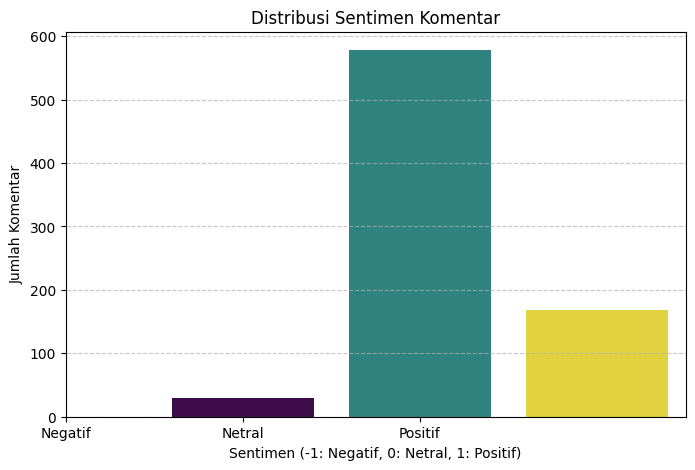


UJI NORMALITAS DATA SENTIMEN
Data Sentimen - Jumlah Observasi: 776
Unique values: [-1.  0.  1.]
Mean: 0.1804
Std: 0.4718
Skewness: 0.5147
Kurtosis: 0.4632

1. Shapiro-Wilk Test:
   Statistic: 0.634619
   P-value: 0.000000
   Kesimpulan: Data TIDAK berdistribusi normal

2. D'Agostino's K-squared Test:
   Statistic: 36.547453
   P-value: 0.000000
   Kesimpulan: Data TIDAK berdistribusi normal

3. Kolmogorov-Smirnov Test:
   Statistic: 0.431128
   P-value: 0.000000
   Kesimpulan: Data TIDAK berdistribusi normal

4. Anderson-Darling Test:
   Statistic: 150.753185
   Critical Values: [0.573 0.653 0.783 0.913 1.086]
   Significance Levels: [15.  10.   5.   2.5  1. ]
   Interpretasi: Reject H0 at 15.0% level; Reject H0 at 10.0% level; Reject H0 at 5.0% level; Reject H0 at 2.5% level; Reject H0 at 1.0% level


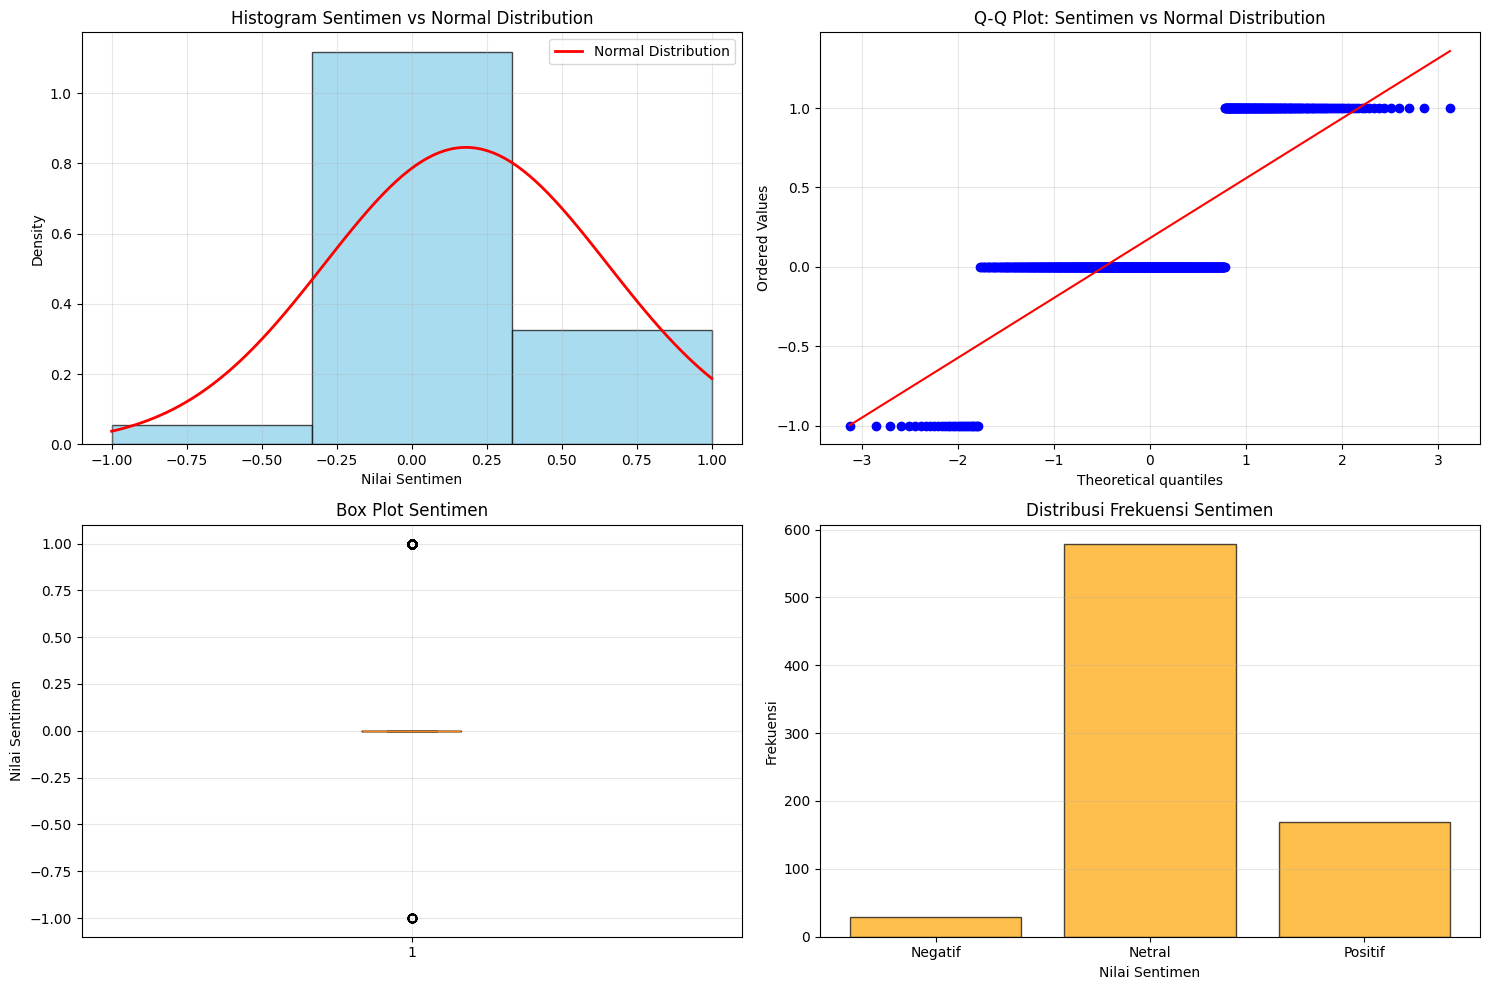


ANALISIS SENTIMEN vs JUMLAH LIKES
Statistik Deskriptif Jumlah Likes per Sentimen:
             count      mean       std  min  25%  50%  75%   max
final_label                                                     
-1.0          29.0  1.206897  2.455014  0.0  0.0  0.0  1.0   8.0
 0.0         578.0  1.610727  3.765531  0.0  0.0  0.0  2.0  40.0
 1.0         169.0  1.355030  2.682281  0.0  0.0  0.0  2.0  20.0


/tmp/ipython-input-1754172001.py:147: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=sentiment_labels)


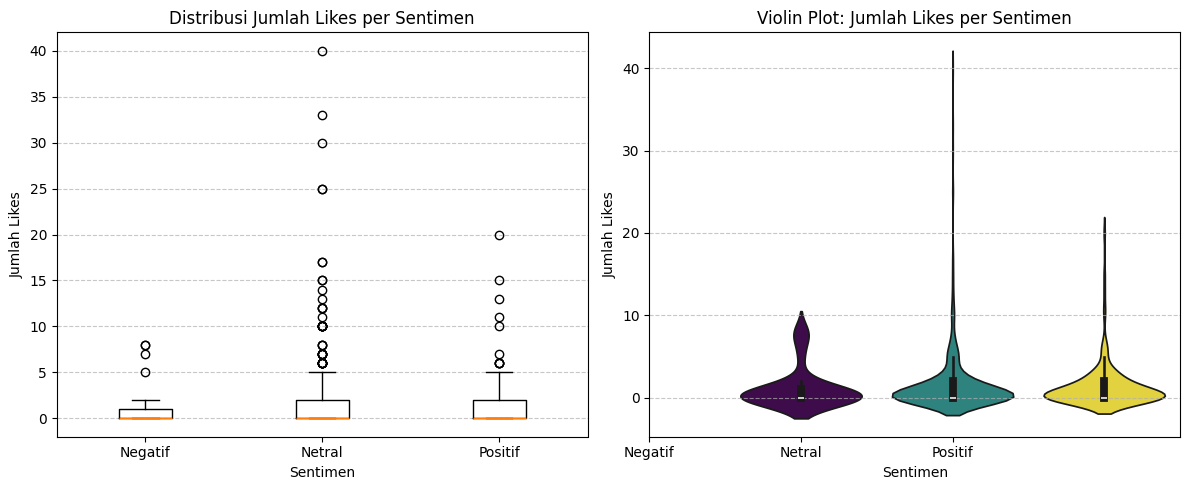


UJI NORMALITAS JUMLAH LIKES PER SENTIMEN

Negatif (n=29):
   Mean: 1.21
   Median: 0.00
   Std: 2.41
   Skewness: 2.0707
   Kurtosis: 2.7359
   Shapiro-Wilk p-value: 0.000000
   Normalitas: TIDAK normal
   D'Agostino p-value: 0.000013
   Normalitas: TIDAK normal

Netral (n=578):
   Mean: 1.61
   Median: 0.00
   Std: 3.76
   Skewness: 5.2889
   Kurtosis: 37.6723
   Shapiro-Wilk p-value: 0.000000
   Normalitas: TIDAK normal
   D'Agostino p-value: 0.000000
   Normalitas: TIDAK normal

Positif (n=169):
   Mean: 1.36
   Median: 0.00
   Std: 2.67
   Skewness: 3.9298
   Kurtosis: 19.1960
   Shapiro-Wilk p-value: 0.000000
   Normalitas: TIDAK normal
   D'Agostino p-value: 0.000000
   Normalitas: TIDAK normal

REKOMENDASI UJI STATISTIK
Berdasarkan hasil uji normalitas:

1. UNTUK DATA SENTIMEN:
   - Data sentimen adalah data diskrit/kategorikal (-1, 0, 1)
   - TIDAK berdistribusi normal (ini wajar untuk data kategorikal)
   - Gunakan uji non-parametrik untuk analisis inferensial

2. UNTUK DATA 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import shapiro, normaltest, kstest, anderson

# -----------------------------
# 1. Distribusi Sentimen
# -----------------------------
print("="*60)
print("DISTRIBUSI SENTIMEN")
print("="*60)

# Hitung jumlah komentar per sentimen
sentiment_counts = df['final_label'].value_counts().sort_index()

print("Jumlah Komentar per Sentimen:")
print(sentiment_counts)

# Visualisasi distribusi sentimen
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, hue=sentiment_counts.index, palette='viridis', legend=False)
plt.title('Distribusi Sentimen Komentar')
plt.xlabel('Sentimen (-1: Negatif, 0: Netral, 1: Positif)')
plt.ylabel('Jumlah Komentar')
plt.xticks([-1, 0, 1], ['Negatif', 'Netral', 'Positif'])  # Adjusted for barplot indexing
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# -----------------------------
# 2. Uji Normalitas Data Sentimen
# -----------------------------
print("\n" + "="*60)
print("UJI NORMALITAS DATA SENTIMEN")
print("="*60)

# Konversi sentimen ke numerik untuk uji normalitas
sentiment_numeric = df['final_label'].values

print(f"Data Sentimen - Jumlah Observasi: {len(sentiment_numeric)}")
print(f"Unique values: {np.unique(sentiment_numeric)}")
print(f"Mean: {np.mean(sentiment_numeric):.4f}")
print(f"Std: {np.std(sentiment_numeric):.4f}")
print(f"Skewness: {stats.skew(sentiment_numeric):.4f}")
print(f"Kurtosis: {stats.kurtosis(sentiment_numeric):.4f}")

# 1. Shapiro-Wilk Test (cocok untuk n < 5000)
if len(sentiment_numeric) <= 5000:
    shapiro_stat, shapiro_p = shapiro(sentiment_numeric)
    print(f"\n1. Shapiro-Wilk Test:")
    print(f"   Statistic: {shapiro_stat:.6f}")
    print(f"   P-value: {shapiro_p:.6f}")
    print(f"   Kesimpulan: {'Data TIDAK berdistribusi normal' if shapiro_p < 0.05 else 'Data berdistribusi normal'}")
else:
    print(f"\n1. Shapiro-Wilk Test: SKIP (n > 5000)")

# 2. D'Agostino's K-squared Test
dagostino_stat, dagostino_p = normaltest(sentiment_numeric)
print(f"\n2. D'Agostino's K-squared Test:")
print(f"   Statistic: {dagostino_stat:.6f}")
print(f"   P-value: {dagostino_p:.6f}")
print(f"   Kesimpulan: {'Data TIDAK berdistribusi normal' if dagostino_p < 0.05 else 'Data berdistribusi normal'}")

# 3. Kolmogorov-Smirnov Test
ks_stat, ks_p = kstest(sentiment_numeric, 'norm', args=(np.mean(sentiment_numeric), np.std(sentiment_numeric)))
print(f"\n3. Kolmogorov-Smirnov Test:")
print(f"   Statistic: {ks_stat:.6f}")
print(f"   P-value: {ks_p:.6f}")
print(f"   Kesimpulan: {'Data TIDAK berdistribusi normal' if ks_p < 0.05 else 'Data berdistribusi normal'}")

# 4. Anderson-Darling Test
anderson_result = anderson(sentiment_numeric, dist='norm')
print(f"\n4. Anderson-Darling Test:")
print(f"   Statistic: {anderson_result.statistic:.6f}")
print(f"   Critical Values: {anderson_result.critical_values}")
print(f"   Significance Levels: {anderson_result.significance_level}")

# Interpretasi Anderson-Darling
ad_interpretation = []
for i, (cv, sl) in enumerate(zip(anderson_result.critical_values, anderson_result.significance_level)):
    if anderson_result.statistic > cv:
        ad_interpretation.append(f"Reject H0 at {sl}% level")
    else:
        ad_interpretation.append(f"Fail to reject H0 at {sl}% level")

print(f"   Interpretasi: {'; '.join(ad_interpretation)}")

# Visualisasi untuk cek normalitas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram dengan kurva normal
axes[0,0].hist(sentiment_numeric, bins=3, density=True, alpha=0.7, color='skyblue', edgecolor='black')
# Overlay normal distribution
x = np.linspace(sentiment_numeric.min(), sentiment_numeric.max(), 100)
normal_curve = stats.norm.pdf(x, np.mean(sentiment_numeric), np.std(sentiment_numeric))
axes[0,0].plot(x, normal_curve, 'r-', linewidth=2, label='Normal Distribution')
axes[0,0].set_title('Histogram Sentimen vs Normal Distribution')
axes[0,0].set_xlabel('Nilai Sentimen')
axes[0,0].set_ylabel('Density')
axes[0,0].legend()
axes[0,0].grid(alpha=0.3)

# Q-Q Plot
stats.probplot(sentiment_numeric, dist="norm", plot=axes[0,1])
axes[0,1].set_title('Q-Q Plot: Sentimen vs Normal Distribution')
axes[0,1].grid(alpha=0.3)

# Box Plot
axes[1,0].boxplot(sentiment_numeric, vert=True)
axes[1,0].set_title('Box Plot Sentimen')
axes[1,0].set_ylabel('Nilai Sentimen')
axes[1,0].grid(alpha=0.3)

# Bar plot (karena data diskrit)
unique_vals, counts = np.unique(sentiment_numeric, return_counts=True)
axes[1,1].bar(unique_vals, counts, alpha=0.7, color='orange', edgecolor='black')
axes[1,1].set_title('Distribusi Frekuensi Sentimen')
axes[1,1].set_xlabel('Nilai Sentimen')
axes[1,1].set_ylabel('Frekuensi')
axes[1,1].set_xticks(unique_vals)
axes[1,1].set_xticklabels(['Negatif', 'Netral', 'Positif'])
axes[1,1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# -----------------------------
# 3. Analisis Sentimen dan Jumlah Likes
# -----------------------------
print("\n" + "="*60)
print("ANALISIS SENTIMEN vs JUMLAH LIKES")
print("="*60)

# Statistik deskriptif jumlah likes per sentimen
likes_by_sentiment = df.groupby('final_label')['num_of_likes'].describe()

print("Statistik Deskriptif Jumlah Likes per Sentimen:")
print(likes_by_sentiment)

# Visualisasi distribusi jumlah likes per sentimen
plt.figure(figsize=(12, 5))

# Subplot 1: Boxplot
plt.subplot(1, 2, 1)
sentiment_labels = ['Negatif', 'Netral', 'Positif']
box_data = [df[df['final_label'] == label]['num_of_likes'].values for label in [-1, 0, 1]]
plt.boxplot(box_data, labels=sentiment_labels)
plt.title('Distribusi Jumlah Likes per Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Likes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Violin plot (lebih informatif)
plt.subplot(1, 2, 2)
sns.violinplot(x='final_label', y='num_of_likes', data=df, hue='final_label', palette='viridis', legend=False)
plt.title('Violin Plot: Jumlah Likes per Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Likes')
plt.xticks([-1, 0, 1], ['Negatif', 'Netral', 'Positif'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# -----------------------------
# 4. Uji Normalitas Data Likes per Sentimen
# -----------------------------
print("\n" + "="*60)
print("UJI NORMALITAS JUMLAH LIKES PER SENTIMEN")
print("="*60)

sentiment_groups = [-1, 0, 1]
sentiment_names = ['Negatif', 'Netral', 'Positif']

for sentiment_val, sentiment_name in zip(sentiment_groups, sentiment_names):
    likes_data = df[df['final_label'] == sentiment_val]['num_of_likes'].values

    if len(likes_data) == 0:
        print(f"\n{sentiment_name}: Tidak ada data")
        continue

    print(f"\n{sentiment_name} (n={len(likes_data)}):")
    print(f"   Mean: {np.mean(likes_data):.2f}")
    print(f"   Median: {np.median(likes_data):.2f}")
    print(f"   Std: {np.std(likes_data):.2f}")
    print(f"   Skewness: {stats.skew(likes_data):.4f}")
    print(f"   Kurtosis: {stats.kurtosis(likes_data):.4f}")

    # Shapiro-Wilk test (jika n <= 5000)
    if len(likes_data) <= 5000 and len(likes_data) >= 3:
        shapiro_stat, shapiro_p = shapiro(likes_data)
        print(f"   Shapiro-Wilk p-value: {shapiro_p:.6f}")
        print(f"   Normalitas: {'TIDAK normal' if shapiro_p < 0.05 else 'Normal'}")

    # D'Agostino test (jika n >= 8)
    if len(likes_data) >= 8:
        dagostino_stat, dagostino_p = normaltest(likes_data)
        print(f"   D'Agostino p-value: {dagostino_p:.6f}")
        print(f"   Normalitas: {'TIDAK normal' if dagostino_p < 0.05 else 'Normal'}")

# -----------------------------
# 5. Rekomendasi Uji Statistik
# -----------------------------
print("\n" + "="*60)
print("REKOMENDASI UJI STATISTIK")
print("="*60)

print("Berdasarkan hasil uji normalitas:")
print("\n1. UNTUK DATA SENTIMEN:")
print("   - Data sentimen adalah data diskrit/kategorikal (-1, 0, 1)")
print("   - TIDAK berdistribusi normal (ini wajar untuk data kategorikal)")
print("   - Gunakan uji non-parametrik untuk analisis inferensial")

print("\n2. UNTUK DATA LIKES:")
print("   - Data likes umumnya tidak berdistribusi normal (right-skewed)")
print("   - Sering mengandung banyak outlier")
print("   - Uji normalitas menunjukkan data likes per sentimen juga cenderung TIDAK normal.")
print("   - Gunakan uji non-parametrik untuk membandingkan distribusi jumlah likes antar grup sentimen,")
print("     misalnya Kruskal-Wallis test.")
print("="*60)

## Menyimpan Dataframe ke File CSV

Bagian ini akan menyimpan DataFrame yang telah diproses (termasuk label sentimen final dan fitur-fitur tambahan) ke dalam file CSV agar dapat digunakan atau dianalisis lebih lanjut di luar notebook ini.

In [ ]:
# Tentukan nama file output
output_filename = 'komentar_tvri_sentimen_final.csv'

# Simpan DataFrame ke CSV
# index=False agar nomor index DataFrame tidak ikut tersimpan sebagai kolom
df.to_csv(output_filename, index=False)

print(f"✅ DataFrame berhasil disimpan ke {output_filename}")

# Opsional: Tampilkan 5 baris teratas dari DataFrame yang disimpan untuk verifikasi
# Untuk membaca kembali dari CSV:
# df_saved = pd.read_csv(output_filename)
# display(df_saved.head())

✅ DataFrame berhasil disimpan ke komentar_tvri_sentimen_final.csv


## Visualisasi dengan Wordcloud

Bagian ini akan membuat wordcloud untuk menampilkan kata-kata yang paling sering muncul dalam komentar.

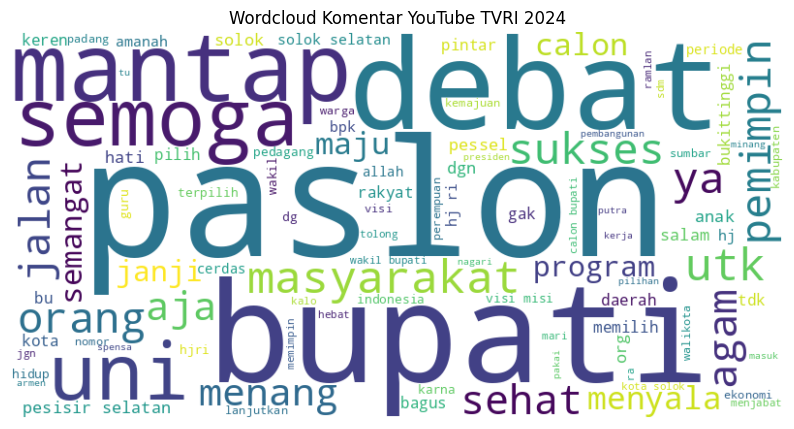

✅ Wordcloud berhasil dibuat.


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pastikan library wordcloud sudah terinstall
# pip install wordcloud matplotlib

# Gabungkan semua komentar yang sudah dibersihkan menjadi satu string
# Ganti 'cleaned_comment' menjadi 'clean_comment'
all_comments_text = " ".join(df['clean_comment'].dropna())

# Buat objek WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis', # Anda bisa coba colormap lain seperti 'plasma', 'inferno', 'cividis'
    stopwords=None, # stopwords sudah dihapus di tahap cleaning, tapi bisa ditambahkan lagi jika perlu
    min_font_size=10
).generate(all_comments_text)

# Tampilkan wordcloud menggunakan matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Sembunyikan axis
plt.title('Wordcloud Komentar YouTube TVRI 2024')
plt.show()

print("✅ Wordcloud berhasil dibuat.")